In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [19]:
pwd

'C:\\Users\\SAI\\machine-learning-LogisticRegression\\Logistic Regression-2'

In [20]:

df=pd.read_csv('advertising.csv')

In [21]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [32]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

Exploration of data,visualizing whethere data is missing or not in any of the column

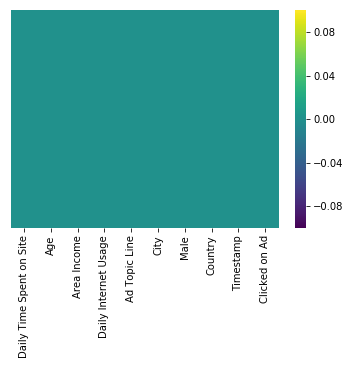

In [22]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [13]:
df.columns



Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

(array([12.,  6., 13., 19., 21., 27., 37., 33., 48., 48., 39., 60., 38.,
        43., 39., 39., 50., 36., 37., 30., 68., 26., 23., 21., 30., 18.,
        13., 16., 18., 20., 12., 15., 10.,  9.,  7.,  2.,  6.,  4.,  2.,
         5.]),
 array([19.  , 20.05, 21.1 , 22.15, 23.2 , 24.25, 25.3 , 26.35, 27.4 ,
        28.45, 29.5 , 30.55, 31.6 , 32.65, 33.7 , 34.75, 35.8 , 36.85,
        37.9 , 38.95, 40.  , 41.05, 42.1 , 43.15, 44.2 , 45.25, 46.3 ,
        47.35, 48.4 , 49.45, 50.5 , 51.55, 52.6 , 53.65, 54.7 , 55.75,
        56.8 , 57.85, 58.9 , 59.95, 61.  ]),
 <a list of 40 Patch objects>)

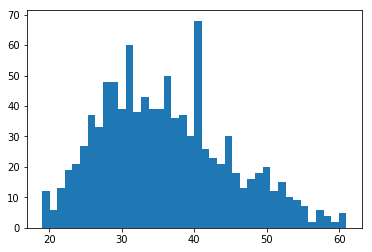

In [31]:
plt.hist(df['Age'],bins=40)

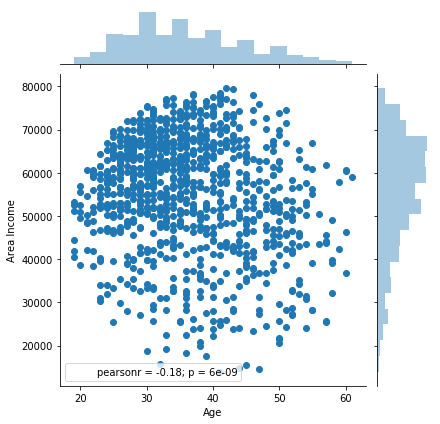

In [39]:
sns.jointplot(x="Age",y="Area Income",kind='scatter',data=df)

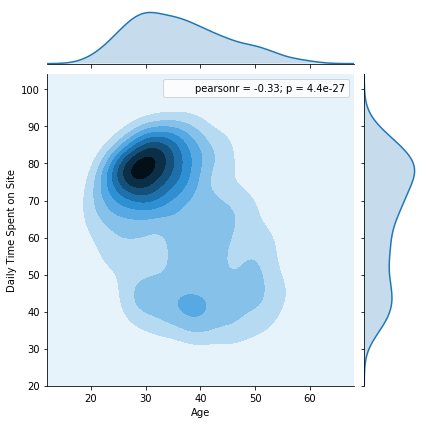

In [40]:
sns.jointplot(data=df,x="Age",y="Daily Time Spent on Site",kind='kde')

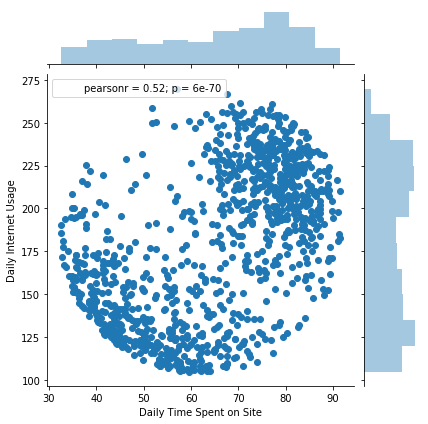

In [41]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df)

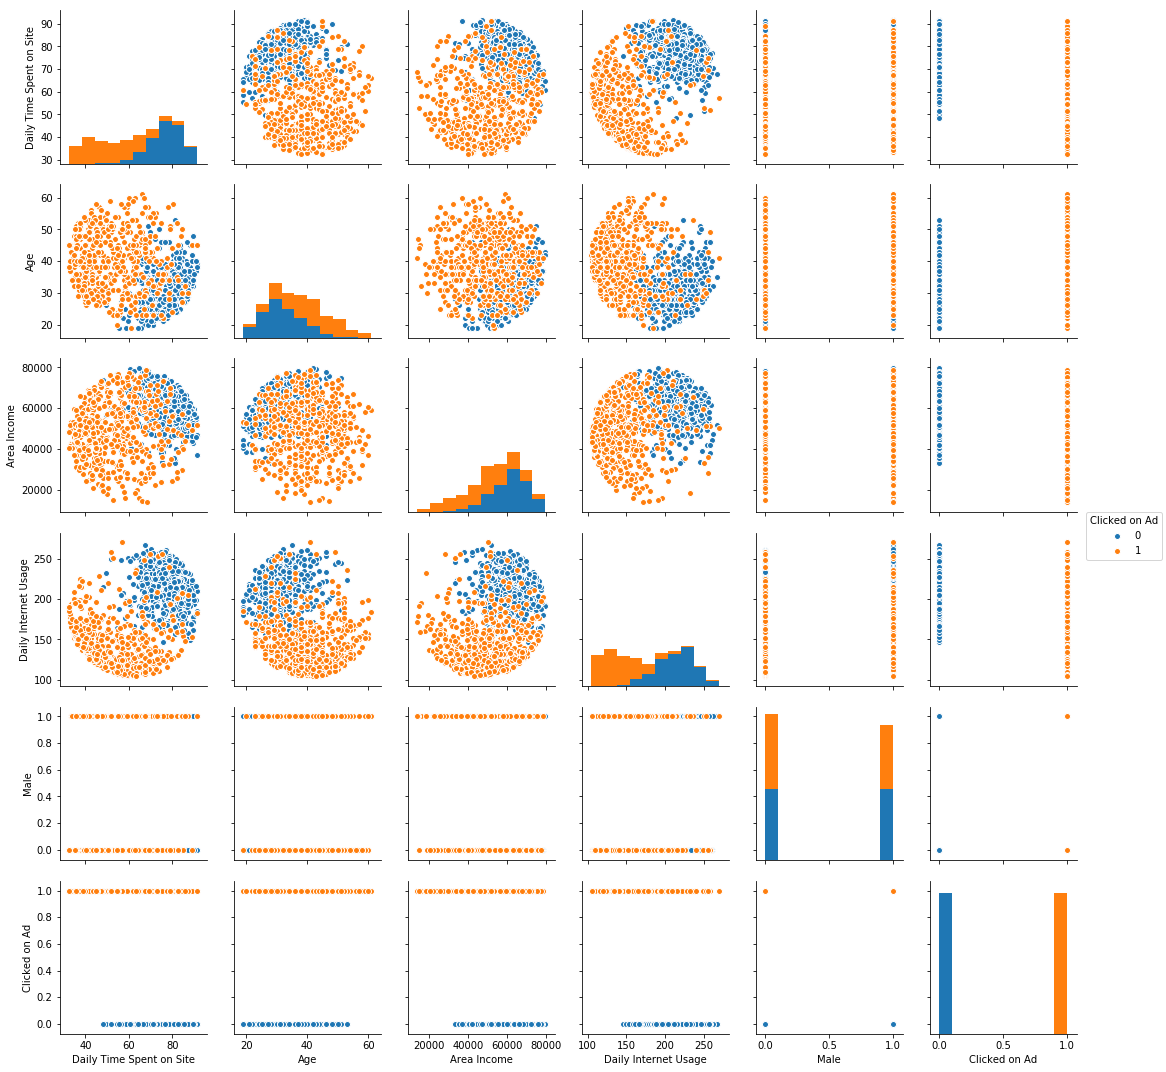

In [42]:
sns.pairplot(data=df,hue='Clicked on Ad')

training the logistic regression model

In [43]:
from sklearn.cross_validation import train_test_split

In [44]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [46]:
X=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
y=df['Clicked on Ad']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.33)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logr=LogisticRegression()

In [50]:
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

predictions

In [51]:
predictions=logr.predict(X_test)

metrics

In [52]:
from sklearn import metrics

In [53]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       0.94      0.91      0.92       176
          1       0.90      0.93      0.91       154

avg / total       0.92      0.92      0.92       330



In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[160  11]
 [ 16 143]]
